I noted that the quasars coming from the announcement script (Scripts/andes_announcement_histograms.py) appear in more tiles than the labeled as QSO target.

**This notebook is made to show which tiles contain quasars** (identified as quasars by the previous script)

In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pickle
from astropy.io import fits

sys.path.append('..')
from LyaPlotter.computations import Computations
from LyaPlotter.plotter import Plotter
from LyaPlotter.sims import CoLoReSim, LyaCoLoReSim, QuickQuasarsSim
from LyaPlotter.file_types_minisv import zBestFilesMiniSV, CoaddFilesMiniSV, DrqFile
from LyaPlotter.file_types import cached_property

# Stephen script

Filtering QSO to grab quasars obtained by Stephen Bailey (targetids from those quasars obtained before and saved into file):

In [3]:
import glob
from pathlib import Path
andes_location = '/global/cfs/cdirs/desi/spectro/redux/andes/tiles/'

andes_path = Path(andes_location)

all_tiles = []
for x in sorted(andes_path.iterdir()):
    all_tiles.append(int(Path(x).name))

In [4]:
tiles = all_tiles

In [5]:
zbestfiles = []
for tile in map(str,tiles):
    tile_path = Path(andes_location+'/'+tile)
#     obs = max(tile_path.iterdir())
    for obs in tile_path.iterdir():
        zbestfiles.extend( glob.glob(str(obs) +'/zbest*.fits'))

I'll grab the exact tid for each tile containing quasars (I previously saved them into two pkl files):
- files: zbest files.
- tids_steph: for each zbest file in ``files`` the tids that correspond to quasars. 

In [6]:
with open('../Data/tids.pkl','rb') as f:
    tids_steph = np.asarray(pickle.load(f))
    
with open('../Data/zbest_files.pkl','rb') as f:
    files = np.asarray(pickle.load(f))

In [7]:
targetids = np.loadtxt(tids_path,dtype=int)
class zBestUsingStephenQsos(zBestFilesMiniSV):
    @cached_property
    def qsos_target_ids(self):
        previous_targetids = list()
        tids= list()
        with self.open_hdulists():
            for fp in self.file_paths:
                where = np.where(files == fp)[0][0]
                tids.append(tids_steph[where])
            return tids

In [8]:
x = zBestUsingStephenQsos(zbestfiles)

In [9]:
x.N_obj

1514

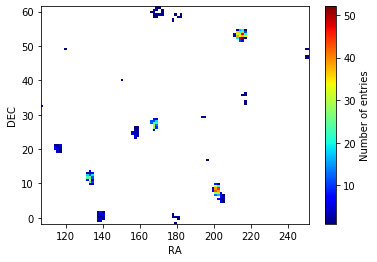

In [10]:
x.plot_footprint()

In [11]:
x.tile

array([63159, 63211, 63224, ..., 70512, 70512, 70512], dtype=int32)

In [12]:
tiles, tile_count = np.unique(x.tile, return_counts=True)

In [13]:
for tile, count in zip(tiles,tile_count):
    print(tile,count)

63159 1
63211 1
63224 21
63225 1
65008 1
66000 6
66003 6
66014 3
66019 3
67142 43
67230 47
68000 218
68001 238
68002 337
70002 192
70003 106
70004 39
70005 34
70006 4
70500 2
70502 4
70506 75
70508 25
70510 4
70511 42
70512 61


There are tiles that do not correspond to QSO tiles:

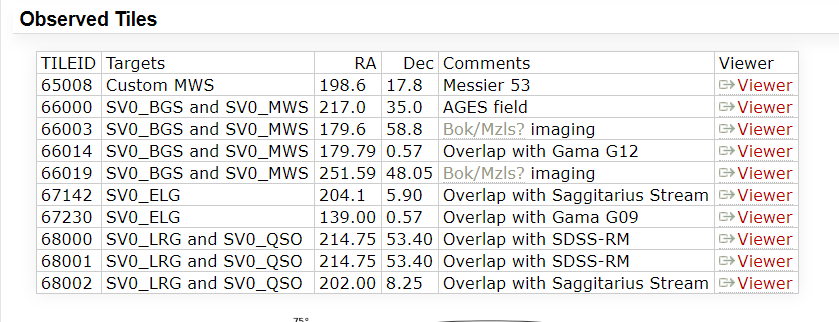

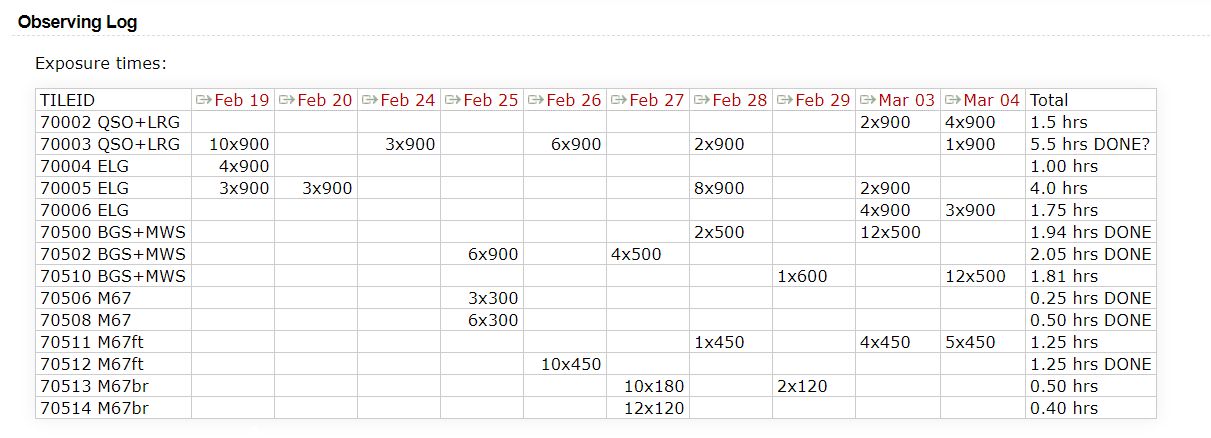